In [57]:
import numpy as np
import pandas as pd
import json
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# TODO do away with the stored json file and create it specifically for the notebook from the DB each time notebook is run
# conn = sqlite3.connect('parsed_links.sqlite')
# cur = conn.cursor()
# json_spec = pd.read_sql_query('SELECT id, json FROM Urls', conn)
# df = pd.DataFrame(json_spec)
# # df.set_index('id', inplace=True)
# df.head()

In [58]:
# display all columns in the dataframe
pd.set_option('display.max_columns', None)

# load data from the json file
df_pre = pd.read_json('all_properties.json', orient='index', convert_axes=False)
df_pre = df_pre.set_index('Listing Number')
df_pre.head()

,Price,Blurb,Type of Property,Listing Date,Erf Size,Bedrooms,Bathrooms,Kitchens,Lounges,Parking,Outbuilding,Outside Toilets,Lifestyle,Floor Size,Rates and Taxes,Kitchen,Facing,Roof,Wall,Floor,Security,Pets Allowed,Bedroom 1,Bedroom 2,Bathroom,Lounge,Gardens,Standalone Building,Description,Price per m²,Bedroom 3,Dining Room,Garage,Pool,Levies,Family/TV Room,Garden,Special Feature,Garage 1,Garage 2,Garage 3,Family/TV Rooms,Furnished,Nearby Public Transport,Wheelchair Accessible,Occupation Date,Reception Rooms,Special Levy,No Transfer Duty,Lease Period,Bedroom,Deposit Requirements,Rooms,Domestic Rooms,Entrance Hall,Flatlet,Other,Bedroom 4,Parking 1,Parking 2,Floor Number,Style,Window,Number of floors,Special Features,Internet Access,Generator,Backup Water,Dining Rooms,Bathroom 1,Bathroom 2,Office/study,Bedroom 5,Bedroom 6,Entrance Halls,Special Featuress,Age,Braai Room,Coverage,Secure Parking,Zoning,Common Toilets,Temperature Control
Listing Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
112637018,R 499 000,2 Bedroom House for sale in La Rochelle,House,09 May 2023,140 m²,2.0,1.0,1.0,1.0,1,Outside Toilets,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112636963,R 890 000,3 Bedroom House for sale in Mamelodi East,House,09 May 2023,420 m²,3.0,2.0,NaN,NaN,Parking features,NaN,NaN,Suburban,65 m²,R 408,Laundry,West,"Tile, Insulation",Plaster,Tiled Floors,"Electric Gate, Perimeter Wall",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112637711,R 600 000,2 Bedroom House for sale in Lenasia South,House,09 May 2023,NaN,2.0,NaN,NaN,NaN,"Visitors Parking, Carport",NaN,NaN,NaN,481 m²,R 261,"Tiled Floors, Curtain Rails",NaN,NaN,NaN,NaN,"Burglar Bars, Perimeter Wall",Yes,"Tiled Floors, Curtain Rails, Built-in Cupboard...","Tiled Floors, Curtain Rails, Single Bed","Tiled Floors, Bath, Toilet and Basin","Tiled Floors, Curtain Rails",1.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112637556,R 990 000,3 Bedroom Apartment / flat for sale in Waterkloof,Apartment / Flat,09 May 2023,NaN,3.0,2.0,NaN,NaN,2,NaN,NaN,"Complex, Security Complex",81 m²,NaN,,NaN,NaN,NaN,NaN,Security Gate,No,,,NaN,,NaN,NaN,First Floor,R 12 222,,,,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112636967,R 899 000,2 Bedroom Townhouse for sale in Annlin,Townhouse,09 May 2023,NaN,2.0,1.5,1.0,NaN,1,NaN,NaN,NaN,NaN,R 500,NaN,NaN,NaN,NaN,NaN,"Security Gate, Intercom",Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,R 2 130,1,Yes,"Satellite Dish, Paveway",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 112637018 to 112642174
Data columns (total 83 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    118 non-null    object 
 1   Blurb                    118 non-null    object 
 2   Type of Property         118 non-null    object 
 3   Listing Date             60 non-null     object 
 4   Erf Size                 37 non-null     object 
 5   Bedrooms                 96 non-null     float64
 6   Bathrooms                98 non-null     float64
 7   Kitchens                 51 non-null     float64
 8   Lounges                  32 non-null     float64
 9   Parking                  89 non-null     object 
 10  Outbuilding              5 non-null      object 
 11  Outside Toilets          1 non-null      float64
 12  Lifestyle                24 non-null     object 
 13  Floor Size               48 non-null     object 
 14  Rates and Taxes  

### Structure df so that only columns that are most likely to contain data remain for now

In [60]:
df_nulls = df_pre.isnull().sum().sort_values()
df_nulls.head(10)

Price                0
Blurb                0
Type of Property     0
Bathrooms           20
Bedrooms            22
Parking             29
Pets Allowed        56
Listing Date        58
Kitchens            67
Security            69
dtype: int64

**Keep price,type,bath,bed, blurb**

In [61]:
# List of columns to keep
columns_to_keep = ['Price', 'Blurb', 'Type of Property', 'Bathrooms', 'Bedrooms']

# Drop all columns except the specified list
df = df_pre[columns_to_keep]
df

,Price,Blurb,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,
112637018,R 499 000,2 Bedroom House for sale in La Rochelle,House,1.0,2.0
112636963,R 890 000,3 Bedroom House for sale in Mamelodi East,House,2.0,3.0
112637711,R 600 000,2 Bedroom House for sale in Lenasia South,House,NaN,2.0
112637556,R 990 000,3 Bedroom Apartment / flat for sale in Waterkloof,Apartment / Flat,2.0,3.0
112636967,R 899 000,2 Bedroom Townhouse for sale in Annlin,Townhouse,1.5,2.0
...,...,...,...,...,...
112642676,R 12 500,2 Bedroom Apartment / flat to rent in Zonnebloem,Apartment / Flat,2.0,2.0
111163550,R 3 900,0.5 Bedroom House to rent in Rietfontein,House,1.0,NaN
112642682,R 585 000,3 Bedroom Apartment / flat for sale in Arcadia,Apartment / Flat,2.0,3.0


**Check for NaN values**

In [62]:
# check for bedroom NaNs and replace

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    # Access the values in each row using column names
    bedroom_value = row['Bedrooms']
    blurb_value = row['Blurb']
    try:
        # bedroom number is 1st character in string so simple index slice and cast to float
        bedrooms = float(blurb_value[0])
    except:
        continue

    # Check if a value is NaN using pd.isna()
    if pd.isna(bedroom_value):
        df.at[index, 'Bedrooms'] = bedrooms

# if any bathroom NaN then drop the row
df.dropna(subset=['Bathrooms'], inplace=True)
        
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 112637018 to 112642174
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             98 non-null     object 
 1   Blurb             98 non-null     object 
 2   Type of Property  98 non-null     object 
 3   Bathrooms         98 non-null     float64
 4   Bedrooms          97 non-null     float64
dtypes: float64(2), object(3)
memory usage: 4.6+ KB
None


C:\Users\Margie\AppData\Local\Temp\ipykernel_4048\2554437355.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Bathrooms'], inplace=True)


,Price,Blurb,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,
112637018,R 499 000,2 Bedroom House for sale in La Rochelle,House,1.0,2.0
112636963,R 890 000,3 Bedroom House for sale in Mamelodi East,House,2.0,3.0
112637556,R 990 000,3 Bedroom Apartment / flat for sale in Waterkloof,Apartment / Flat,2.0,3.0
112636967,R 899 000,2 Bedroom Townhouse for sale in Annlin,Townhouse,1.5,2.0
112637405,R 829 000,2 Bedroom Apartment / flat for sale in Montana,Apartment / Flat,2.0,2.0


In [63]:
# clean price values by removing currency symbol and spaces then cast as int
df['Price'] = df['Price'].str.slice(start=2).str.replace(" ", "").astype('int64')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 112637018 to 112642174
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             98 non-null     int64  
 1   Blurb             98 non-null     object 
 2   Type of Property  98 non-null     object 
 3   Bathrooms         98 non-null     float64
 4   Bedrooms          97 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.6+ KB
None


C:\Users\Margie\AppData\Local\Temp\ipykernel_4048\2102948790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.slice(start=2).str.replace(" ", "").astype('int64')


,Price,Blurb,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,
112637018,499000,2 Bedroom House for sale in La Rochelle,House,1.0,2.0
112636963,890000,3 Bedroom House for sale in Mamelodi East,House,2.0,3.0
112637556,990000,3 Bedroom Apartment / flat for sale in Waterkloof,Apartment / Flat,2.0,3.0
112636967,899000,2 Bedroom Townhouse for sale in Annlin,Townhouse,1.5,2.0
112637405,829000,2 Bedroom Apartment / flat for sale in Montana,Apartment / Flat,2.0,2.0


In [64]:
# Extract the Suburb from the blurb
df['Suburb'] = df['Blurb'].str.split(' in ').str[-1].str.strip()

# # drop blurb as no longer needed
# df = df.drop('Blurb', axis=1)

df

C:\Users\Margie\AppData\Local\Temp\ipykernel_4048\1855965489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Suburb'] = df['Blurb'].str.split(' in ').str[-1].str.strip()


,Price,Blurb,Type of Property,Bathrooms,Bedrooms,Suburb
Listing Number,,,,,,
112637018,499000,2 Bedroom House for sale in La Rochelle,House,1.0,2.0,La Rochelle
112636963,890000,3 Bedroom House for sale in Mamelodi East,House,2.0,3.0,Mamelodi East
112637556,990000,3 Bedroom Apartment / flat for sale in Waterkloof,Apartment / Flat,2.0,3.0,Waterkloof
112636967,899000,2 Bedroom Townhouse for sale in Annlin,Townhouse,1.5,2.0,Annlin
112637405,829000,2 Bedroom Apartment / flat for sale in Montana,Apartment / Flat,2.0,2.0,Montana
...,...,...,...,...,...,...
112642487,12500,3 Bedroom House to rent in Die Wilgers,House,2.0,3.0,Die Wilgers
112642676,12500,2 Bedroom Apartment / flat to rent in Zonnebloem,Apartment / Flat,2.0,2.0,Zonnebloem
111163550,3900,0.5 Bedroom House to rent in Rietfontein,House,1.0,0.0,Rietfontein


In [65]:
df.describe()

,Price,Bathrooms,Bedrooms
count,98.000000,98.000000,97.000000
mean,361577.969388,1.372449,2.180412
std,382154.044244,0.472497,1.021094
min,1458.000000,1.000000,0.000000
25%,7687.500000,1.000000,2.000000
50%,14600.000000,1.000000,2.000000
75%,750000.000000,2.000000,3.000000
max,990000.000000,2.500000,6.000000


In [66]:
# Calculate the value counts for the 'Suburb' column
suburb_counts = df['Suburb'].value_counts()

# Create a new DataFrame with the suburb counts
suburb_counts_df = pd.DataFrame({'Suburb': suburb_counts.index, 'Count': suburb_counts.values})

# Sort the DataFrame by the count column in descending order
sorted_df = suburb_counts_df.sort_values('Count', ascending=False)

# Display the sorted DataFrame
print(sorted_df)

              Suburb  Count
0            Montana      9
2          Sunnyside      4
1             Annlin      4
3            Arcadia      3
8        Faerie Glen      2
..               ...    ...
36  Wonderboom South      1
38        Zonnebloem      1
39          Bellevue      1
40          Philippi      1
73       Rietfontein      1

[74 rows x 2 columns]


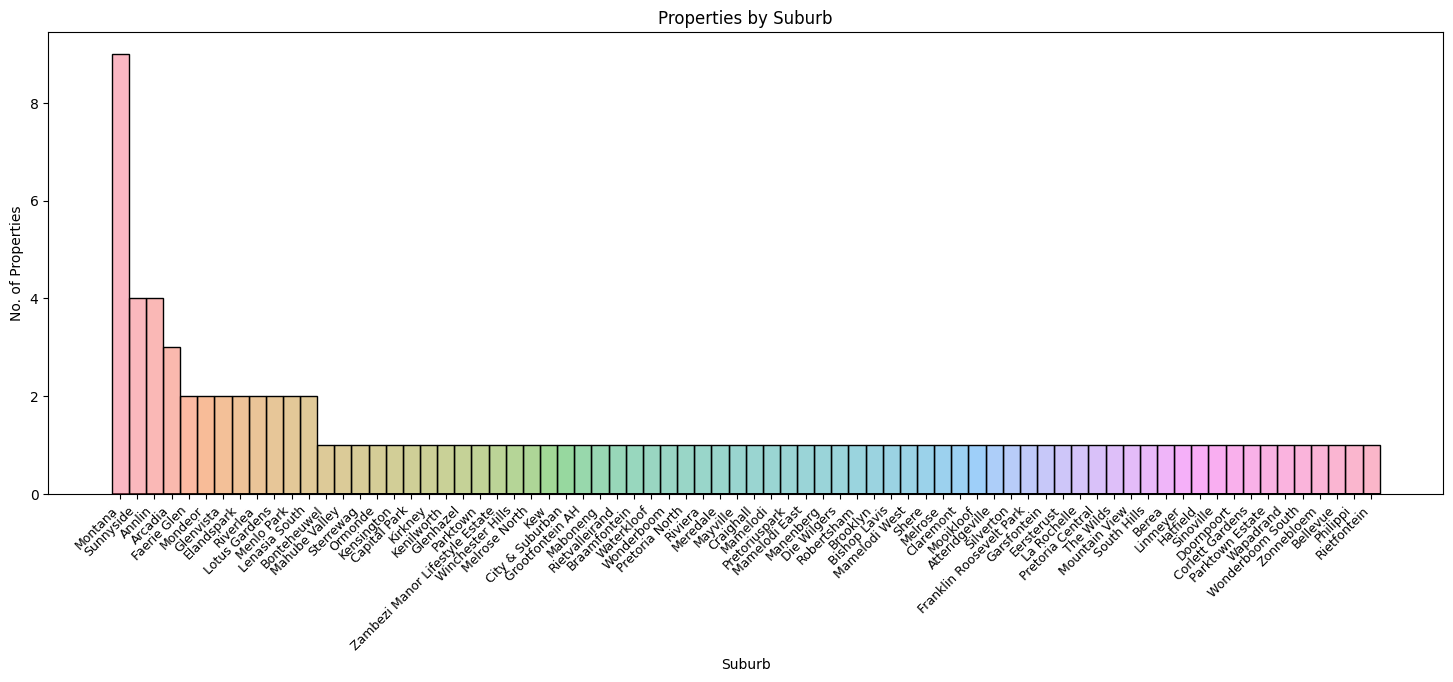

In [67]:
# Create the histogram plot
plt.figure(figsize=(18, 6))  # Set the figure size

# Customize the histogram appearance using Seaborn
sns.histplot(data=sorted_df, 
             x='Suburb',
             weights= 'Count',
             hue='Suburb', 
             edgecolor='black', 
             legend=False
            )

plt.xticks(rotation=45, ha='right', fontsize=9)

# Add labels and title
plt.xlabel('Suburb')
plt.ylabel('No. of Properties')
plt.title('Properties by Suburb')

# Show the plot
plt.show()